## Text Scraping & Visualization Example

In this notebook we will go through an example of how to download data from a website and visualize it. As a toy example, we will use <i>the publications page from the Crockett Lab website</i>.

First, we import the libraries we'll need

In [1]:
# A module to open URLs
from urllib.request import urlopen

# A module to extract data from html files
from bs4 import BeautifulSoup

# A module to download files
import requests

# A module for plotting
import matplotlib.pyplot as plt
%matplotlib inline

# A module for generating word clouds from text
import wordcloud

Next, we retrive the html of the page and format it

In [2]:
# Get the html of the page
url = "http://www.crockettlab.org/publications"
html = urlopen(url)
type(html)

http.client.HTTPResponse

In [3]:
# Create a Beautiful Soup object from the html
soup = BeautifulSoup(html, 'lxml')
type(soup)

bs4.BeautifulSoup

From this, we can get a number of attributes:

In [4]:
# Get the title
title = soup.title
print(title)

<title>Publications — Crockett Lab</title>


In [5]:
# Get the text
text = soup.get_text()
print(soup.text)








Publications — Crockett Lab













SQUARESPACE_ROLLUPS = {};
(function(rollups, name) { if (!rollups[name]) { rollups[name] = {}; } rollups[name].js = ["//assets.squarespace.com/universal/scripts-compressed/common-a639a6dae64b3a202578e-min.en-US.js"]; })(SQUARESPACE_ROLLUPS, 'squarespace-common');
Static = window.Static || {}; Static.SQUARESPACE_CONTEXT = {"facebookAppId":"314192535267336","facebookApiVersion":"v6.0","rollups":{"squarespace-announcement-bar":{"js":"//assets.squarespace.com/universal/scripts-compressed/announcement-bar-8f2316b1dc974d80438d8-min.en-US.js"},"squarespace-audio-player":{"css":"//assets.squarespace.com/universal/styles-compressed/audio-player-52bdd87acccf92a19703e60e09c654bd-min.css","js":"//assets.squarespace.com/universal/scripts-compressed/audio-player-c333a668e1904ac5a53d0-min.en-US.js"},"squarespace-blog-collection-list":{"css":"//assets.squarespace.com/universal/styles-compressed/blog-collection-list-d41d8cd98f00b204e9800998ecf8427e-min.cs

We'd like to get the title of every paper listed on the website. I noticed all paper titles are bolded, so let's find the elements in the 'soup' that are bolded (i.e. using the strong tag)

In [6]:
# The paper titles
all_titles = soup.find_all('strong')

print(all_titles[:5])

[<strong>Beliefs about bad people are volatile</strong>, <strong>Moral transgressions corrupt neural representations of value</strong>, <strong>Moral outrage in the digital age</strong>, <strong>Inference of trustworthiness from intuitive moral judgments</strong>, <strong>Harm to others outweighs harm to self in moral decision making</strong>]


In [7]:
# These don't look like strings (which usually have quotes)...
# What format is it?

type(all_titles[0])

bs4.element.Tag

In [8]:
# Let's loop through and conver to string

titles = [] # Initialize an empty list
for title in soup.find_all('strong'): # For each title from our 'soup'...
    titles.append(str(title)) # convert to string and append to the empty list

# Did it work?
print(type(titles[0]))
print(titles[0])

<class 'str'>
<strong>Beliefs about bad people are volatile</strong>


In [9]:
print(titles[:10])

['<strong>Beliefs about bad people are volatile</strong>', '<strong>Moral transgressions corrupt neural representations of value</strong>', '<strong>Moral outrage in the digital age</strong>', '<strong>Inference of trustworthiness from intuitive moral judgments</strong>', '<strong>Harm to others outweighs harm to self in moral decision making</strong>', '<strong>Models of morality</strong>', '<strong>A theory of moral praise<br/></strong>', '<strong>Prosocial behaviour is associated with transdiagnostic markers of affective sensitivity in multiple domains<br/></strong>', '<strong>Using social and behavioural science to support COVID-19 pandemic response<br/></strong>', '<strong>A neuroeconomic model of gender disparities in moralistic punishment<br/></strong>']


In [10]:
# The tags are left over! Let's remove them:

titles_clean = []
for title in titles:
    title = str(title).replace('<strong>', '')
    title = title.replace('</strong>', '')
    title = title.replace('<br/>', '')
    titles_clean.append(title)
    
print(titles_clean[:10])

['Beliefs about bad people are volatile', 'Moral transgressions corrupt neural representations of value', 'Moral outrage in the digital age', 'Inference of trustworthiness from intuitive moral judgments', 'Harm to others outweighs harm to self in moral decision making', 'Models of morality', 'A theory of moral praise', 'Prosocial behaviour is associated with transdiagnostic markers of affective sensitivity in multiple domains', 'Using social and behavioural science to support COVID-19 pandemic response', 'A neuroeconomic model of gender disparities in moralistic punishment']


Great! Now we have a list of titles of papers listed on the website. Let's visualize it using a word cloud!

In [11]:
# For the wordcloud funcion, we need to combine our list of titles into one long sting.

all_words = '' # Initialize empty string
for title in titles_clean: 
    tokens = title.split(' ') # split each title into its words
    tokens = " ".join(tokens) # join the list of words into one long string
    all_words += tokens+" " # append the words from this title to the string of all titles

print(all_words[:50])

Beliefs about bad people are volatile Moral transg


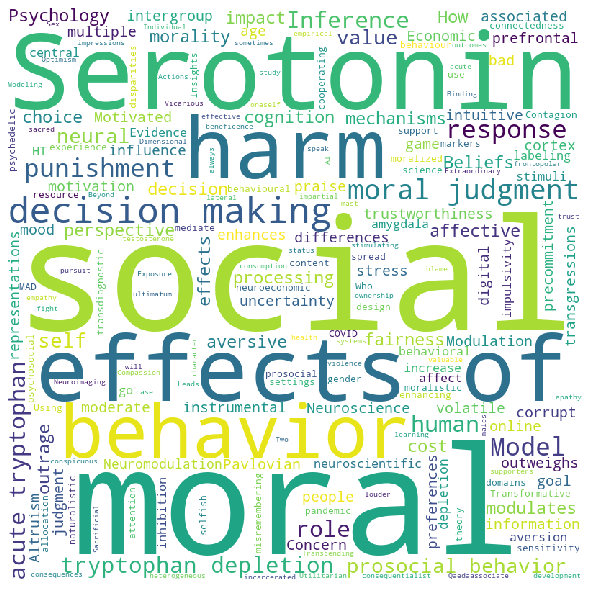

In [12]:
# Create the word cloud from the string containing all titles
wcloud = wordcloud.WordCloud(width = 800, height = 800, 
                background_color ='white', 
                min_font_size = 10).generate(all_words) 

# plot the WordCloud image                        
plt.figure(figsize = (8, 8))
plt.imshow(wcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

### Let's try to download these papers!

In [13]:
# We will use again the find_all() method of soup to extract useful html tags
# Some examples:
# < a > for hyperlinks
# < table > for tables
# < tr > for table rows
# < th > for table headers
# < td > for table cells

soup.find_all('a')

[<a href="/research">Research</a>,
 <a href="/people">People</a>,
 <a href="/publications">Publications</a>,
 <a href="/news-1">Media</a>,
 <a href="/contact">Contact</a>,
 <a href="/">
             
               Crockett Lab
             
           </a>,
 <a href="/research">Research</a>,
 <a href="/people">People</a>,
 <a href="/publications">Publications</a>,
 <a href="/news-1">Media</a>,
 <a href="/contact">Contact</a>,
 <a>Menu</a>,
 <a href="https://www.nature.com/articles/s41562-018-0425-1" target="_blank">Link»</a>,
 <a href="/s/9rrttrrivmzlsqespjn3h72fy2g3xq" target="_blank">View PDF»</a>,
 <a href="/s/r9x2u9f41keg5s7pc9dwsykv9iv0ga" target="_blank">View commentary»</a>,
 <a href="https://www.ncbi.nlm.nih.gov/pubmed/28459442" target="_blank">PubMed link»</a>,
 <a href="/s/nn4557-t44w.pdf" target="_blank">View PDF»</a>,
 <a href="http://www.nature.com/articles/s41562-017-0213-3" target="_blank">Link»</a>,
 <a href="/s/Crockett_2017_NHB_Outrage.pdf" target="_blank">View PDF»<

In [14]:
# Let's get the links only:

all_links = soup.find_all("a")
for link in all_links:
    print(link.get("href"))

/research
/people
/publications
/news-1
/contact
/
/research
/people
/publications
/news-1
/contact
None
https://www.nature.com/articles/s41562-018-0425-1
/s/9rrttrrivmzlsqespjn3h72fy2g3xq
/s/r9x2u9f41keg5s7pc9dwsykv9iv0ga
https://www.ncbi.nlm.nih.gov/pubmed/28459442
/s/nn4557-t44w.pdf
http://www.nature.com/articles/s41562-017-0213-3
/s/Crockett_2017_NHB_Outrage.pdf
http://www.ncbi.nlm.nih.gov/pubmed/27054685
https://www.dropbox.com/s/k9r1adym3243bbe/Everett_2016_JEPG.pdf?dl=0
http://www.ncbi.nlm.nih.gov/pubmed/25404350
https://www.dropbox.com/s/wsismdlei1spg10/Crockett_2014_PNAS.pdf?dl=0
http://www.ncbi.nlm.nih.gov/pubmed/23845564
https://www.dropbox.com/s/9cmhirgafvhreaz/Crockett_2013_TiCS.pdf?dl=0
https://www.sciencedirect.com/science/article/abs/pii/S1364661320301492
/s/1-s20-S1364661320301492-main.pdf
https://www.nature.com/articles/s41562-020-0884-z
/s/Using-social-and-behavioural-science-to-support-COVID-19-pandemic-response-NHB.pdf
https://authors.elsevier.com/a/1a%7EP78MqMicOp

We cannot download data from Dropbox without credentials, so we'll download solely the ones that are available on the webiste

In [15]:
i=0
for link in all_links:
    file = link.get("href") # Get file
    if str(file).startswith('/s/'):
        print(i, file)
        # Request the file
        r = requests.get('http://www.crockettlab.org'+file, allow_redirects=True)
        # Save it to a local directory
        open('crockettpubs/'+str(i)+'.pdf', 'wb').write(r.content)
        i+=1

0 /s/9rrttrrivmzlsqespjn3h72fy2g3xq
1 /s/r9x2u9f41keg5s7pc9dwsykv9iv0ga
2 /s/nn4557-t44w.pdf
3 /s/Crockett_2017_NHB_Outrage.pdf
4 /s/1-s20-S1364661320301492-main.pdf
5 /s/Using-social-and-behavioural-science-to-support-COVID-19-pandemic-response-NHB.pdf
6 /s/Chawla-Earp-Crockett-2020.pdf
7 /s/Carlson-et-al-2020.pdf
8 /s/Brady-Crockett-Van-Bavel-2020.pdf
9 /s/psychadelic-paper-PNAS-rcat.pdf
10 /s/How-Effective-Is-Online-Outrage.pdf
11 /s/How-Effective-Is-Online-Outrage.pdf
12 /s/How-Effective-Is-Online-Outrage.pdf
13 /s/s41467-018-07231-9.pdf
14 /s/1-s20-S2352250X18300034-main.pdf
15 /s/Crockett_Lockwood_2018
16 /s/Actions-Speak-Louder-Than-Outcomes-in-Judgments-of-Prosocial-Behaviour.pdf
17 /s/9rrttrrivmzlsqespjn3h72fy2g3xq
18 /s/r9x2u9f41keg5s7pc9dwsykv9iv0ga
19 /s/p3bjy4qm5ogzkpgps921si1q0svmeq
20 /s/9rrttrrivmzlsqespjn3h72fy2g3xq
21 /s/1-s20-S0022103117308181-main.pdf
22 /s/Kappes-Nussberger-et-al-2018.pdf
23 /s/Sex-differences-in-the-effects-of-acute-stress-on-behavior-in-the-ultim